In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [57]:
np.random.seed(0)

In [58]:
n_pts=500
X,y = datasets.make_circles(n_samples=n_pts , random_state=123, noise=0.1 , factor=0.2)
#print(X)
#print(y)

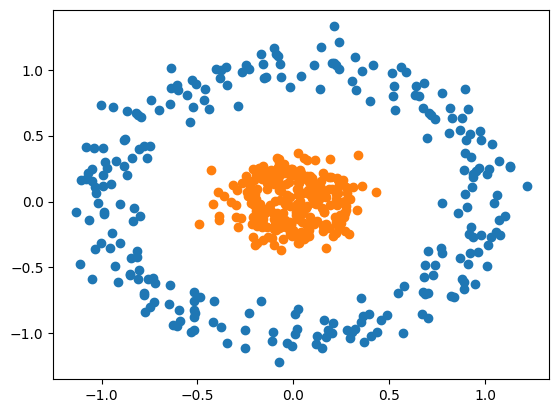

In [59]:
plt.scatter(X[y==0,0],X[y==0 , 1])
plt.scatter(X[y==1,0],X[y==1 , 1])

In [60]:
model= Sequential()
model.add(Dense(4 , input_shape=(2,),activation='sigmoid'))
model.add(Dense(1 , activation='sigmoid'))
model.compile(Adam(lr=0.001),'binary_crossentropy', metrics=['accuracy'])


In [61]:
h=model.fit(x=X,y=y,verbose=1,batch_size=20,epochs=100,shuffle='true')


Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6973 - accuracy: 0.3140
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6968 - accuracy: 0.3300
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.3780
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.4000
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.4300
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.4460
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.4560
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.4780
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.4800
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6955 - accuracy: 0.4980
Epoch 11/

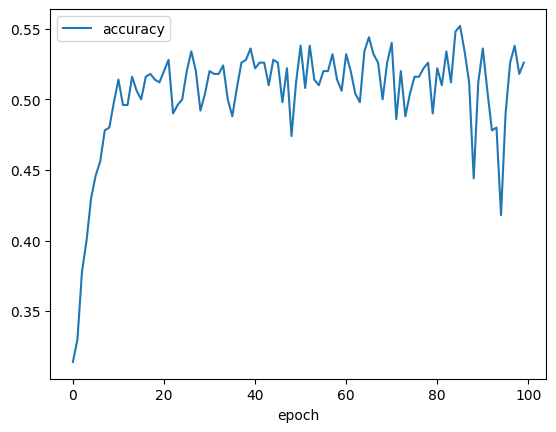

In [62]:
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])

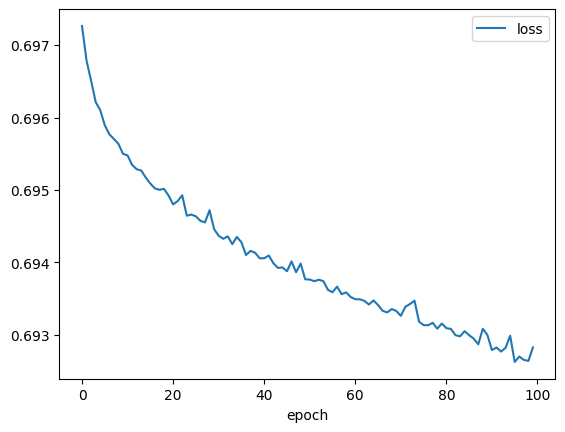

In [63]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])

1/1 [==============================] - 0s 28ms/step
Prediction is:  [[0.5114849]]


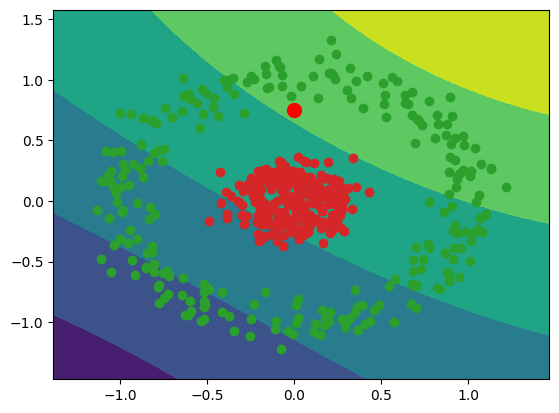

In [64]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plot_decision_boundary(X, y, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

x = 0
y = 0.75

point = np.array([[x, y]])
predict = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is: ", predict)